# Programming for Data Analysis

## Project
<br/>

#### Lecturer: Brian McGinley

#### Student: Damien Connolly

#### Student number: G00340321
<br/>

**************************************************************************************************************************

#### Introduction
**TEXT**

Homeless persons in Ireland

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Magic command to ensure that plots render inline [https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline]
%matplotlib inline

In [4]:
# Set seaborn style
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")

In [5]:
# Create empty dataframe
df = pd.DataFrame()

#### Gender

Total - 6,906

Male - 4,018
Female - 2,888

In [6]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# Define the gender variables

choice = ["Male", "Female"]

# the random.choice function lets us distribute the data to match the real world data 

gender = np.random.choice(choice, 6906, p=[0.5818, 0.4182])


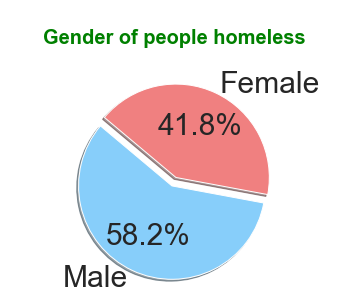

In [7]:
# Adapted from: https://pythonspot.com/matplotlib-pie-chart/ 

# Data to plot
labels = 'Male', 'Female'
slices_gender = [0.5818, 0.4182]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(slices_gender, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 30})
plt.title("\nGender of people homeless\n", fontweight="bold", fontsize="20", color="g")

plt.axis('equal')
plt.show()

In [8]:
df = pd.DataFrame(data={"Gender": gender})
df

,Gender
0,Male
1,Female
2,Male
3,Female
4,Female
...,...
6901,Female
6902,Male
6903,Female
6904,Female


#### Age Group

Total average age - 30 (30.5)

Male - 33 (33.2)

Female - 27 (26.8)



In [9]:
# View age data
agefile = pd.read_csv("HomelessAge.csv")
agefile.describe()

,Male,Female
count,16.000000,16.000000
mean,251.125000,180.500000
std,129.780777,128.913408
min,30.000000,13.000000
25%,154.250000,61.500000
50%,288.000000,172.000000
75%,361.000000,279.000000
max,436.000000,386.000000


In [10]:
agefile

,Age-group,Male,Female
0,0-4,379,386
1,5-9,292,273
2,10-14,190,174
3,15-19,165,170
4,20-24,286,335
5,25-29,355,375
6,30-34,381,297
7,35-39,436,263
8,40-44,384,198
9,45-49,348,151


In [23]:
af = agefile.drop([0,1,2,13,14,15])
af

,Age-group,Male,Female
3,15-19,165,170
4,20-24,286,335
5,25-29,355,375
6,30-34,381,297
7,35-39,436,263
8,40-44,384,198
9,45-49,348,151
10,50-54,290,86
11,55-59,213,66
12,60-64,122,48


Text(0.5, 1.0, 'Distribution of Ages')

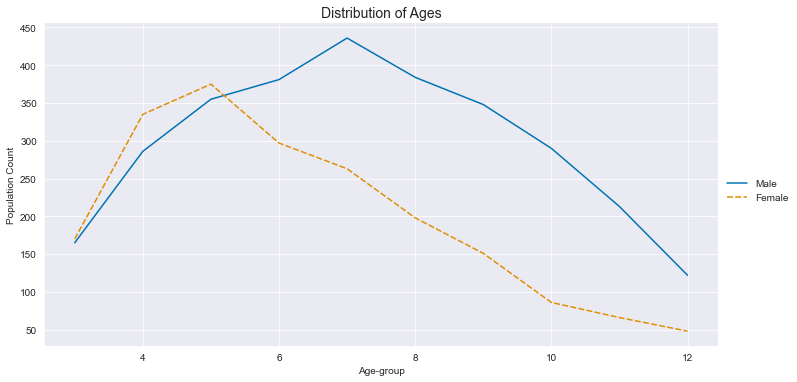

In [24]:
sns.relplot(kind="line", data=af, height=5, aspect=2) # Use aspect to make plot wider
plt.xlabel('Age-group')
plt.ylabel('Population Count')
plt.title('Distribution of Ages', fontsize=14)

piece of information that I need is the mode of the data. The mode will simply be the age where the total population value is highest (in the imported data), so I can extract this from the DataFrame.

In [25]:
m = stats.mode("Male")
print(m)

ModeResult(mode=array(['Male'], dtype='<U4'), count=array([1]))


In [115]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# Age variable created based on gender and course type
cnt = 0
for idx, val in enumerate(df.itertuples()):
    if df.Gender[idx] == "Male":
            df.loc[idx, 'Age'] = round(np.random.triangular(4, 37.5, 75)) 
    elif df.Gender[idx] == "Female":
            df.loc[idx, 'Age'] = round(np.random.triangular(4, 27.5, 75)) 

In [105]:
# View age data
#agefile = pd.read_csv("HomelessAge.csv")
df.describe()

,Age
count,6906.000000
mean,36.602954
std,14.101716
min,4.000000
25%,27.000000
50%,37.000000
75%,46.000000
max,75.000000


In [107]:
df

,Gender,Age
0,Male,24.0
1,Female,39.0
2,Male,34.0
3,Female,48.0
4,Female,48.0
...,...,...
6901,Female,40.0
6902,Male,28.0
6903,Female,40.0
6904,Female,52.0


#### Location








In [135]:
ls = pd.read_csv("location.stats.csv")
ls

,Region,Male,Female,Total
0,Dublin,2802,2207,5009
1,South West,285,186,471
2,Mid West,265,131,396
3,South East,203,120,323
4,Mid East,163,68,231
5,West,119,70,189
6,North East,100,53,153
7,Midland,50,44,94
8,North West,31,9,40
9,Total,4018,2888,6906


Dublin = 72.53%